Fitting 5 folds for each of 72 candidates, totalling 360 fits
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       437
           1       1.00      1.00      1.00        63

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



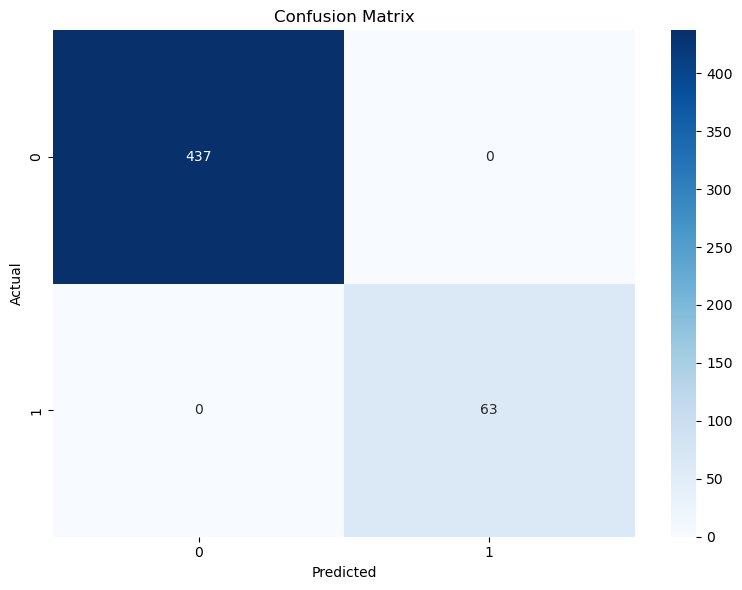

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import GridSearchCV

#Step 1: Import CSVs
df_train = pd.read_csv('../Data/train_data.csv', delimiter=",")
df_test = pd.read_csv('../Data/test_data.csv', delimiter=",")

#Step 2: Separate features and target
X_train = df_train.drop(columns=["Rain"])
y_train = df_train['Rain']

X_test = df_test.drop(columns=["Rain"])
y_test = df_test['Rain']

# Step 3: Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 14, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=47),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Step 4: Picking best model from tuning
best_rf = grid_search.best_estimator_
tuned_preds = best_rf.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, tuned_preds))
print("\nClassification Report:\n", classification_report(y_test, tuned_preds))

#Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, tuned_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#Step 6: Save the model as pkl file in artifacts
with open("../Artifacts/randomforest_model.pkl", "wb") as file:
    pickle.dump(best_rf, file)

#Step 7: Save predictions to CSV
comparison_df = X_test.copy()
comparison_df["Actual Rain"] = y_test.values
comparison_df["Predicted Rain"] = tuned_preds

comparison_df.to_csv("../Artifacts/randomforest_prediction.csv", index=False)